# Задача
**Дана функция f(x) = (sin(x)/2 + cos(x)/2) ** 2 * sin(x)**
**Для решения используйте период**

*1. Определить корни*

*2. Найти интервалы, на которых функция возрастает*

*3. Найти интервалы, на которых функция убывает*

*4. Построить график (на 1 периоде)*

*5. Вычислить вершину*

*6. Определить промежутки, на котором f > 0*

*7. Определить промежутки, на котором f < 0*

In [1]:
from sympy import *

In [2]:
x = Symbol('x')
function = (sin(x)/2 + cos(x)/2) ** 2 * sin(x)
simple = trigsimp(function)
simple

sin(x)*sin(x + pi/4)**2/2

# 1. Определить корни

In [3]:
roots = solve(simple, x)
roots.sort()
pretty_print(roots)
print('Числовые значения', end = ': ')
for i in roots:
    print(i.evalf(), end = ', ')

⎡-π      3⋅π   ⎤
⎢───, 0, ───, π⎥
⎣ 4       4    ⎦
Числовые значения: -0.785398163397448, 0, 2.35619449019234, 3.14159265358979, 

In [4]:
solveset(simple, x)

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

# 2-3. Найти интервалы, на которых функция возрастает/убывает

In [5]:
derivative = diff(function)
derivative

(-sin(x) + cos(x))*(sin(x)/2 + cos(x)/2)*sin(x) + (sin(x)/2 + cos(x)/2)**2*cos(x)

**Периодичность**

In [6]:
periodicity(simple, x)

2*pi

In [7]:
diffroots = solve(derivative, x)
diffroots.sort()
for i in diffroots:
    print(i, '\t', round(i.evalf(),2))

-2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2) 	 -2.08
-pi/4 	 -0.79
2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2) 	 -0.27
2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2) 	 1.06
3*pi/4 	 2.36
2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2) 	 2.87


In [8]:
if diffroots[-1] != pi:
    diffroots.append(pi)
if diffroots[0] != -pi:
    diffroots.insert(0, -pi)
diffroots.sort()
for i in diffroots:
    print(i, '\t', round(i.evalf(),2))

-pi 	 -3.14
-2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2) 	 -2.08
-pi/4 	 -0.79
2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2) 	 -0.27
2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2) 	 1.06
3*pi/4 	 2.36
2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2) 	 2.87
pi 	 3.14


In [9]:
for i in range(len(diffroots) - 1):
    intervals = derivative.subs(x, (diffroots[i+1] + diffroots[i])/2)
    if intervals > 0:
        print(f'Функция возрастает в интервале: {round(diffroots[i].evalf(),2)}, {round(diffroots[i+1].evalf(), 2)}')
    else:
        print(f'Функция убывает в интервале: {round(diffroots[i].evalf(),2)}, {round(diffroots[i+1].evalf(), 2)}')

Функция убывает в интервале: -3.14, -2.08
Функция возрастает в интервале: -2.08, -0.79
Функция убывает в интервале: -0.79, -0.27
Функция возрастает в интервале: -0.27, 1.06
Функция убывает в интервале: 1.06, 2.36
Функция возрастает в интервале: 2.36, 2.87
Функция убывает в интервале: 2.87, 3.14


# 4. Построить график

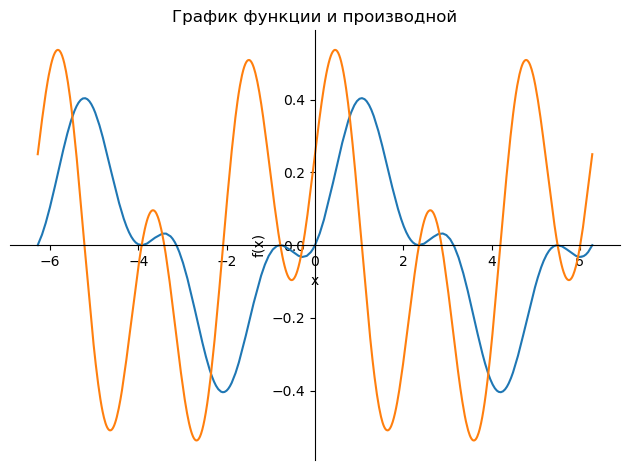

In [10]:
graph = plot(simple, derivative, (x, -2*pi, 2*pi), title = "График функции и производной")

# 5. Вычислить вершину

In [11]:
for i in range(len(diffroots)):
    extremum = simple.subs(x, diffroots[i])
    print(f'{i+1}-я вершина: x = {round(diffroots[i].evalf(), 2)}, f(x) = {round(extremum, 2)}')

1-я вершина: x = -3.14, f(x) = 0
2-я вершина: x = -2.08, f(x) = -0.40
3-я вершина: x = -0.79, f(x) = 0
4-я вершина: x = -0.27, f(x) = -0.03
5-я вершина: x = 1.06, f(x) = 0.40
6-я вершина: x = 2.36, f(x) = 0
7-я вершина: x = 2.87, f(x) = 0.03
8-я вершина: x = 3.14, f(x) = 0


# 6. Определить промежутки, на котором f > 0

In [12]:
pprint(solve(function > 0, x), use_unicode = True)

                    3⋅π
x > 0 ∧ x < π ∧ x ≠ ───
                     4 


# 7. Определить промежутки, на котором f < 0

In [13]:
pprint(solve(function < 0, x), use_unicode = True)

                      7⋅π
x > π ∧ x < 2⋅π ∧ x ≠ ───
                       4 
